In [1]:
import pandas as pd
import numpy as np
from numpy import fliplr
from numpy import flipud
from numpy import array
from pandas.io.json import json_normalize
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import json
import math
import pymongo
from pymongo import MongoClient

def connect_database():
 
    client = MongoClient('localhost', 27017)
    db = client['bitcoin']
    collection = db['btc']
    return db, collection

def data_extraction(filed, collection):
    '''
    extract a certain filed('close') of data from the collecttion 
    '''

    data = []
    for doc in list(collection.find())[:10000]:
        data.append(doc[filed])
    data = array(data)
    data = flipud(data)
    return data

    

def feature_engineering(df):
    """
    preprocess data for better result
    :return:
    """
def take_by_window(dataset, window):
    x, y = [], []
    for i in range(len(dataset) - window ):
        x.append(dataset[i:(i + window)])
        y.append(dataset[i + window,])
    x = np.array(x)
    y = np.array(y)
    x = np.reshape(x, (x.shape[0], 1, x.shape[1]))
    return x, y

def pred_model(x_train, y_train, x_test, y_test, step_size=1, num_features=10, epochs=100, batch_size=128, verbose=2):
    """
    ML model: LSTM
    Look_back: how many point
    :return:
    """

    model = Sequential()
    model.add(LSTM(4, input_shape=(step_size, num_features)))
    model.add(Dense(1))  # output file size
    model.add(Activation('tanh'))  # active function
    model.add(Dropout(0.1))  # drop out regulation
    model.compile(loss='mse', optimizer='adam')

    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    score = model.evaluate(x_test, y_test, batch_size=128)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    return score, pred_train, pred_test



Using TensorFlow backend.


In [2]:
db, collection = connect_database()
df = data_extraction('close', collection)
dataset = df.astype('float32')
mms = MinMaxScaler(feature_range=(0, 1))
dataset = mms.fit_transform(dataset)


/Users/anwang/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/anwang/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [3]:
train_size = int(len(dataset)*0.85)
train_set, test_set = dataset[0:train_size], dataset[train_size:]

print(len(train_set),len(test_set),len(dataset))

8500 1500 10000


In [4]:
x_train, y_train = take_by_window(train_set, 10)
x_test, y_test = take_by_window(test_set, 10)

In [5]:
score, pred_train, pred_test = pred_model(x_train, y_train, x_test, y_test, step_size=1, num_features=10, epochs=100, batch_size=128, verbose=2)
print(score)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/100
0s - loss: 0.2769
Epoch 2/100
0s - loss: 0.1179
Epoch 3/100
0s - loss: 0.0478
Epoch 4/100
0s - loss: 0.0332
Epoch 5/100
0s - loss: 0.0278
Epoch 6/100
0s - loss: 0.0258
Epoch 7/100
0s - loss: 0.0246
Epoch 8/100
0s - loss: 0.0233
Epoch 9/100
0s - loss: 0.0199
Epoch 10/100
0s - loss: 0.0201
Epoch 11/100
0s - loss: 0.0207
Epoch 12/100
0s - loss: 0.0205
Epoch 13/100
0s - loss: 0.0184
Epoch 14/100
0s - loss: 0.0196
Epoch 15/100
0s - loss: 0.0180
Epoch 16/100
0s - loss: 0.0204
Epoch 17/100
0s - loss: 0.0202
Epoch 18/100
0s - loss: 0.0195
Epoch 19/100
0s - loss: 0.0196
Epoch 20/100
0s - loss: 0.0203
Epoch 21/100
0s - loss: 0.0177
Epoch 22/100
0s - loss: 0.0185
Epoch 23/100
0s - loss: 0.0190
Epoch 24/100
0s - loss: 0.0201
Epoch 25/100
0s - loss: 0.0199
Epoch 26/100
0s - loss: 0.0190
Epoch 27/100
0s - loss: 0.0186
Epoch 28/100
0s - loss: 0.

In [6]:
pred_train = mms.inverse_transform(pred_train)
y_train = mms.inverse_transform(y_train)
pred_test = mms.inverse_transform(pred_test)
y_test = mms.inverse_transform(y_test)

/Users/anwang/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/anwang/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [7]:
window = 10
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot[window:len(pred_train) + window] = pred_train[:,0] 

In [8]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(pred_train) + (window * 2) :len(dataset) ] = pred_test[:,0]

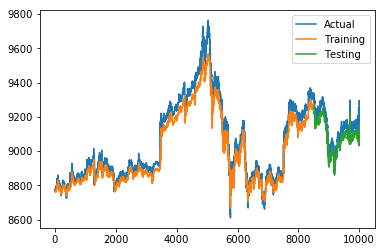

In [9]:
plt.plot(df, label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"]).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"]).close, label='Testing')
plt.legend(loc='best')
plt.show()

In [ ]:
trainScore = math.sqrt(mean_squared_error(y_train, pred_train[:, 0]))
print('Train Score: %.2f MSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, pred_test[:, 0]))
print('Test Score: %.2f MSE' % (testScore))

In [ ]:
coll_test = db['test1']

for i in pred_test[:,0]:
    db.test1.insert_one({'pred_test': float(i)})

In [ ]:
len(pred_train) + (window * 2) + 1

In [ ]:
len(pred_test)

In [ ]:
len(pred_train)

In [ ]:
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"]).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"]).close, label='Testing')
plt.legend(loc='best')
plt.show()

In [ ]:
a[10]